# Section 1: Import Libraries and Load data

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Scikit-learn model-related imports
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Scikit-learn metrics-related imports
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
)

# Load dataset
file_path = 'dataset.csv'
dataset = pd.read_csv(file_path)

C:\Users\Popo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


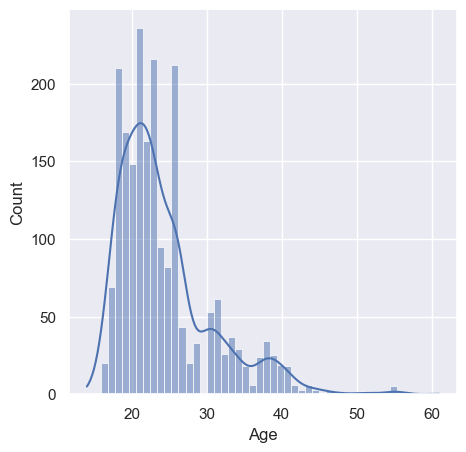

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
sns.histplot(dataset['Age'], bins=50, kde=True)
plt.show()

# Section 2: Preprocessing and Visualization

In [30]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Family_history',	'Alcohol',	'Junk_food','Snack', 'Smoking', 'Transportation','TV', 'Discipline', 'Cardiovascular_risk(y)']

for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

            Gender          Age   Height(cm)   Weight(kg)  Family_history  \
count  2100.000000  2100.000000  2100.000000  2100.000000     2100.000000   
mean      0.504762    24.302381   170.148286    86.561571        0.816667   
std       0.500096     6.342270     9.340941    26.192242        0.387032   
min       0.000000    14.000000   145.000000    39.000000        0.000000   
25%       0.000000    20.000000   163.000000    65.400000        1.000000   
50%       1.000000    23.000000   170.000000    83.000000        1.000000   
75%       1.000000    26.000000   176.800000   107.250000        1.000000   
max       1.000000    61.000000   198.000000   173.000000        1.000000   

           Alcohol    Junk_food     Vege_day    Meals_day        Snack  \
count  2100.000000  2100.000000  2100.000000  2100.000000  2100.000000   
mean      1.637619     0.883333     2.423333     2.687143     2.669524   
std       0.914972     0.321099     0.584318     0.810088     0.776823   
min       

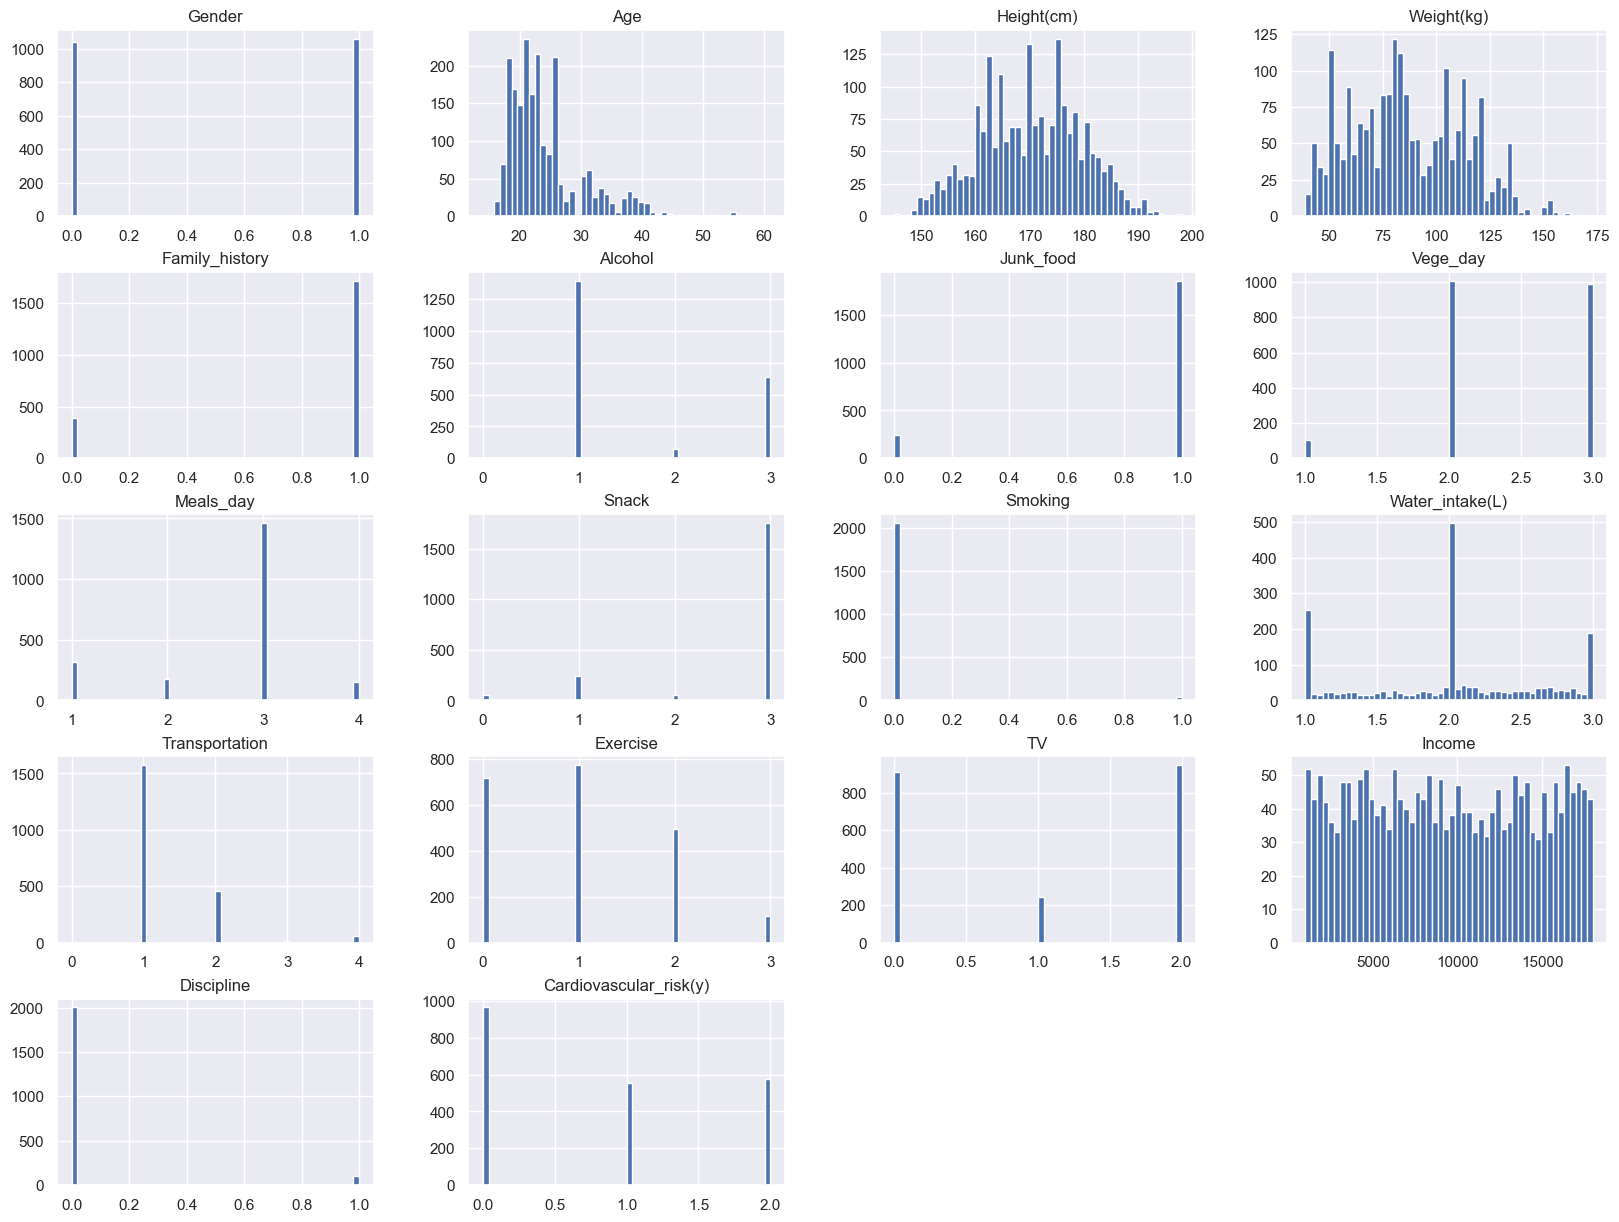

In [31]:
# Show the dataset structure and distribution
print(dataset.describe())
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [32]:
scaler = StandardScaler()
numerical_columns =['Age','Height(cm)','Weight(kg)','Vege_day','Meals_day', 'Water_intake(L)','Exercise', 'Income']
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

In [33]:
dataset.describe()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
count,2100.000000,2.100000e+03,2.100000e+03,2.100000e+03,2100.000000,2100.000000,2100.000000,2.100000e+03,2.100000e+03,2100.000000,2100.000000,2.100000e+03,2100.000000,2.100000e+03,2100.000000,2.100000e+03,2100.000000,2100.000000
mean,0.504762,-2.571488e-16,-5.489789e-16,1.150403e-16,0.816667,1.637619,0.883333,-5.921189e-17,-1.421085e-16,2.669524,0.020952,-2.283887e-16,1.303810,1.192697e-16,1.017619,-3.975656e-17,0.045714,0.813810
std,0.500096,1.000238e+00,1.000238e+00,1.000238e+00,0.387032,0.914972,0.321099,1.000238e+00,1.000238e+00,0.776823,0.143259,1.000238e+00,0.622804,1.000238e+00,0.940424,1.000238e+00,0.208915,0.836916
min,0.000000,-1.624787e+00,-2.692906e+00,-1.816297e+00,0.000000,0.000000,0.000000,-2.436468e+00,-2.083162e+00,0.000000,0.000000,-1.643504e+00,0.000000,-1.124647e+00,0.000000,-1.686086e+00,0.000000,0.000000
25%,0.000000,-6.785277e-01,-7.654463e-01,-8.081252e-01,1.000000,1.000000,1.000000,-7.246638e-01,3.862935e-01,3.000000,0.000000,-7.013790e-01,1.000000,-1.124647e+00,0.000000,-8.873715e-01,0.000000,0.000000
50%,1.000000,-2.053983e-01,-1.587860e-02,-1.360105e-01,1.000000,1.000000,1.000000,-7.246638e-01,3.862935e-01,3.000000,0.000000,-1.211886e-02,1.000000,-6.919269e-03,1.000000,-4.116769e-02,0.000000,1.000000
75%,1.000000,2.677312e-01,7.122728e-01,7.900567e-01,1.000000,3.000000,1.000000,9.871404e-01,3.862935e-01,3.000000,0.000000,7.709460e-01,1.000000,1.110809e+00,2.000000,8.816683e-01,0.000000,2.000000
max,1.000000,5.787575e+00,2.982392e+00,3.300940e+00,1.000000,3.000000,1.000000,9.871404e-01,1.621021e+00,3.000000,1.000000,1.619266e+00,4.000000,2.228537e+00,2.000000,1.713125e+00,1.000000,2.000000


In [34]:
# Separate features and target
X = dataset.drop('Cardiovascular_risk(y)', axis = 1)
y = dataset['Cardiovascular_risk(y)']

In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print('full set shape=', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)

full set shape= (2100, 17)
train shape= (1680, 17)
test shape= (420, 17)


In [36]:
categorical_columns2 = ['Gender', 'Family_history',	'Alcohol',	'Junk_food','Snack', 'Smoking', 'Transportation','TV', 'Discipline']
for col in categorical_columns2:
    dataset[col] = label_encoder.fit_transform(dataset[col])

numerical_columns2 =['Age','Height(cm)','Weight(kg)','Vege_day','Meals_day', 'Water_intake(L)','Exercise', 'Income']
dataset[numerical_columns2] = scaler.fit_transform(dataset[numerical_columns2])

X_train_num = X_train[numerical_columns2]
X_train_cat = X_train[categorical_columns2]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train_num)
X_train_num_tr = imputer.transform(X_train_num) 

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
encoder.fit(X_train_cat)
X_train_cat_tr = encoder.transform(X_train_cat)

### From here
# Combine transformed numerical and categorical data
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])

# Apply the same transformations to the test set
X_test_num = X_test.drop(['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline'], axis=1)
X_test_cat = X_test[['Gender', 'Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking', 'Transportation', 'TV', 'Discipline']]

X_test_num_tr = imputer.transform(X_test_num)
X_test_num_tr = scaler.transform(X_test_num_tr)
X_test_cat_tr = encoder.transform(X_test_cat)
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_tr])

# Display the shape of the processed training data
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)

print('X_test_tr shape:', X_test_tr.shape)
print('y_test shape:', y_test.shape)

X_train_tr shape: (1680, 25)
y_train shape: (1680,)
X_test_tr shape: (420, 25)
y_test shape: (420,)


C:\Users\Popo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


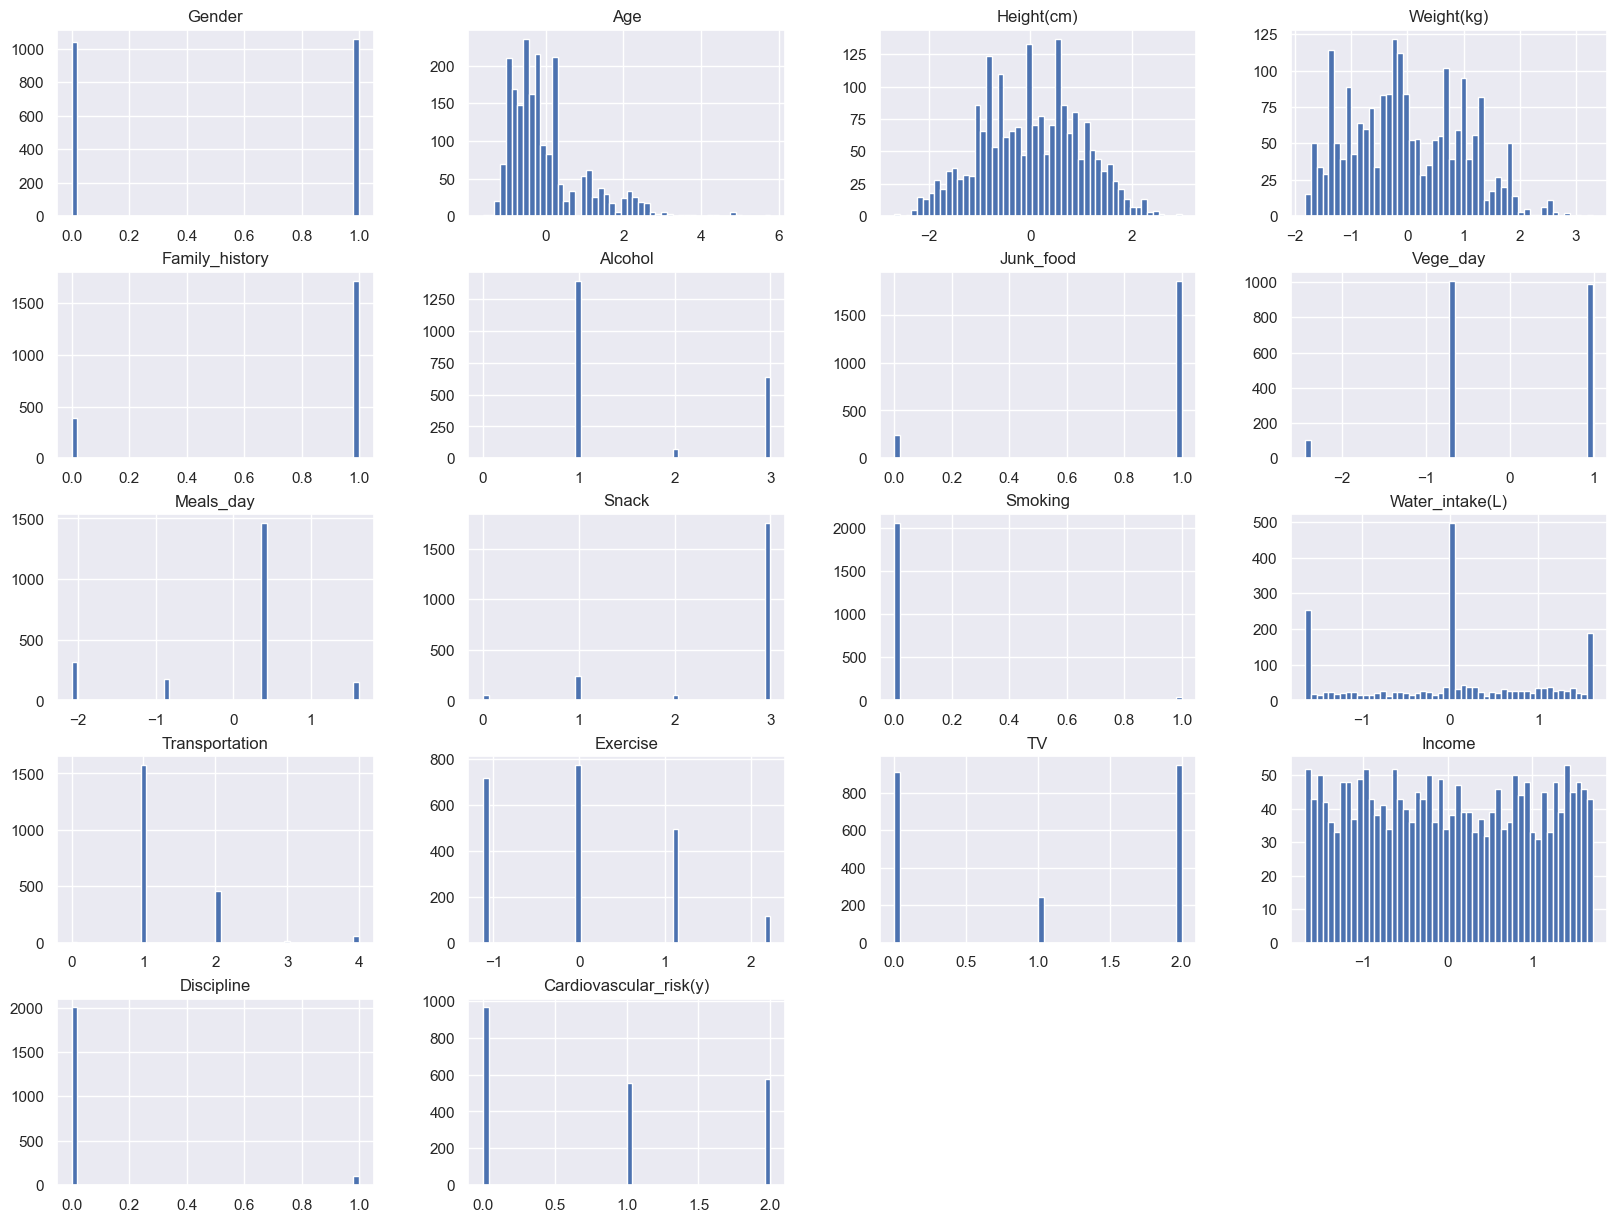

C:\Users\Popo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


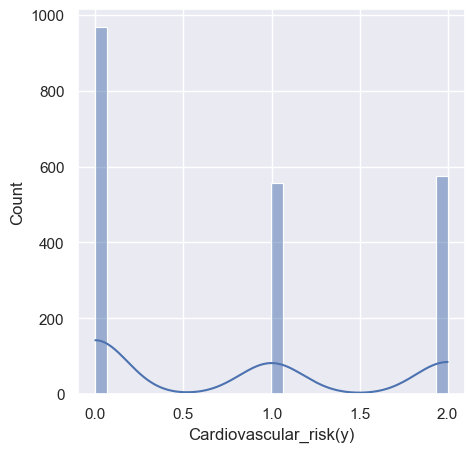

In [37]:
# write code to plot the histogram of each numerical attribute
dataset.hist(bins = 50, figsize = (20, 15))
plt.show()

sns.set(rc={'figure.figsize':(5,5)})
sns.histplot(dataset['Cardiovascular_risk(y)'], bins=30, kde=True)
plt.show()

# Section 3: Model Training and Evaluation

In [38]:
# Model 1: Decision Tree Classifier Model
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train_tr, y_train)

# Predict on test set
y_pred_tree = tree.predict(X_test_tr)

In [39]:
# Model 2: Random Forest Classifier Model
forest_cls = RandomForestClassifier(n_estimators = 10, random_state = 42)
forest_cls.fit(X_train_tr, y_train)

# Predict on training set using trained regressor
y_pred_forest = forest_cls.predict(X_test_tr)

In [40]:
# Model 3: Logistic Regression Model
log_reg = LogisticRegression(max_iter = 300)
log_reg.fit(X_train_tr, y_train)

#Predict on the training data
y_pred_logreg = log_reg.predict(X_test_tr)

In [41]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

# Cross-validation for Decision Tree
k_fold_scores_tree = cross_val_score(tree, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores_tree = np.sqrt(-k_fold_scores_tree)
print("Decision Tree Model:")
display_scores(rmse_scores_tree)

# Cross-validation for Random Forest
k_fold_scores_forest = cross_val_score(forest_cls, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores_forest = np.sqrt(-k_fold_scores_forest)
print("\nRandom Forest Model:")
display_scores(rmse_scores_forest)

# Cross-validation for Logistic Regression
k_fold_scores_logreg = cross_val_score(log_reg, X_train_tr, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores_logreg = np.sqrt(-k_fold_scores_logreg)
print("\nLogistic Regression Model:")
display_scores(rmse_scores_logreg)


Decision Tree Model:
Scores: [0.24397502 0.25       0.27277236 0.33629635 0.23779743]
Mean: 0.26816823368044673
Standard deviation: 0.03605667981102818

Random Forest Model:
Scores: [0.3318419  0.26163406 0.27817432 0.33629635 0.26726124]
Mean: 0.29504157547799803
Standard deviation: 0.032337390660021954

Logistic Regression Model:
Scores: [0.17251639 0.24397502 0.25588316 0.16366342 0.18898224]
Mean: 0.20500404402278188
Standard deviation: 0.0377587458304202


# Section 4: Evaluation Metrics and Confusion Matrix

In [42]:
def print_evaluation_metrics(y_test, y_pred, model_name):
    print(f'{model_name}')
    print("Accuracy    = {:.4f}".format(accuracy_score(y_test, y_pred)))
    print("Precision   = {:.4f}".format(precision_score(y_test, y_pred, average='weighted')))
    print("Recall      = {:.4f}".format(recall_score(y_test, y_pred, average='weighted')))
    print("F1 Score    = {:.4f}".format(f1_score(y_test, y_pred, average='weighted')))
    print()

# Print metrics for all models
print_evaluation_metrics(y_test, y_pred_tree, 'Decision Tree')
print_evaluation_metrics(y_test, y_pred_forest, 'Random Forest')
print_evaluation_metrics(y_test, y_pred_logreg, 'Logistic Regression')

# Confusion Matrices
print('Confusion Matrices:')
print('Decision Tree:\n', confusion_matrix(y_test, y_pred_tree))
print('Random Forest:\n', confusion_matrix(y_test, y_pred_forest))
print('Logistic Regression:\n', confusion_matrix(y_test, y_pred_logreg))

Decision Tree
Accuracy    = 0.9548
Precision   = 0.9556
Recall      = 0.9548
F1 Score    = 0.9548

Random Forest
Accuracy    = 0.9667
Precision   = 0.9669
Recall      = 0.9667
F1 Score    = 0.9667

Logistic Regression
Accuracy    = 0.9738
Precision   = 0.9749
Recall      = 0.9738
F1 Score    = 0.9738

Confusion Matrices:
Decision Tree:
 [[184   0   2]
 [  0 112  10]
 [  4   3 105]]
Random Forest:
 [[184   0   2]
 [  0 116   6]
 [  4   2 106]]
Logistic Regression:
 [[186   0   0]
 [  0 113   9]
 [  1   1 110]]


C:\Users\Popo\AppData\Local\Temp\ipykernel_8556\2352055579.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))


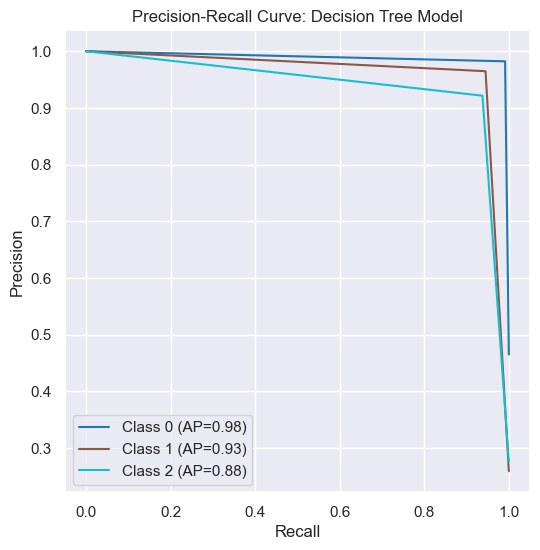

C:\Users\Popo\AppData\Local\Temp\ipykernel_8556\2352055579.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))


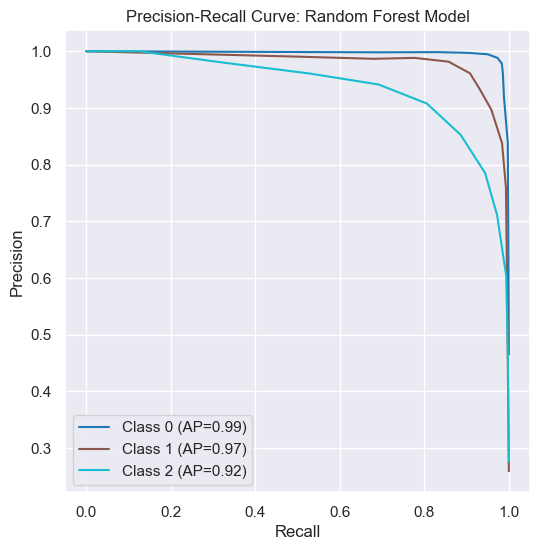

C:\Users\Popo\AppData\Local\Temp\ipykernel_8556\2352055579.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))


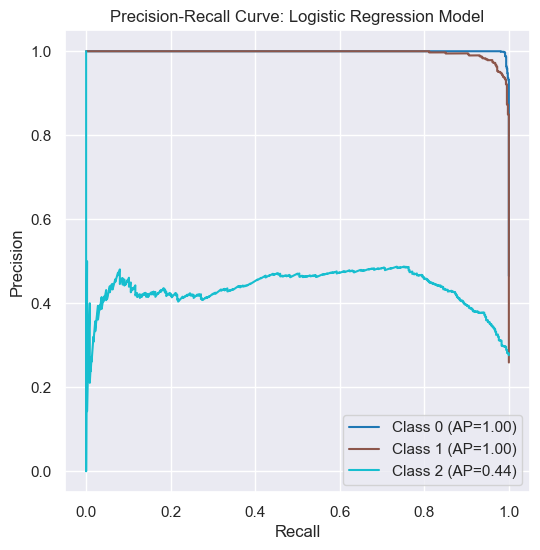

In [43]:
def plot_precision_curve(model, X_train, y_train, title):
    # Binarize labels for multiclass classification
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

    # Train One-vs-Rest classifier
    ovr_classifier = OneVsRestClassifier(model)
    ovr_classifier.fit(X_train, y_train_bin)

    # Check if the model has a 'decision_function' method or fallback to 'predict_proba'
    if hasattr(ovr_classifier, "decision_function"):
        y_scores_cv = cross_val_predict(ovr_classifier, X_train, y_train_bin, cv=3, method="decision_function")
    else:
        y_scores_cv = cross_val_predict(ovr_classifier, X_train, y_train_bin, cv=3, method="predict_proba")

    # Define color map for different classes
    colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))

    plt.figure(figsize=(6, 6))

    # Compute precision-recall curve for each class
    for i in range(len(ovr_classifier.classes_)):
        if y_scores_cv.ndim > 1:
            y_scores = y_scores_cv[:, i]
        else:
            y_scores = y_scores_cv
            
        precision, recall, _ = precision_recall_curve(y_train_bin[:, i], y_scores)
        average_precision = average_precision_score(y_train_bin[:, i], y_scores)
        
        # Plot precision-recall curve with distinct color
        plt.plot(recall, precision, color=colors(i), label=f'Class {i} (AP={average_precision:.2f})')

    # Plot settings
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {title}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_precision_curve(tree, X_train, y_train, 'Decision Tree Model')
plot_precision_curve(forest_cls, X_train, y_train, 'Random Forest Model')
plot_precision_curve(log_reg, X_train, y_train, 'Logistic Regression Model')

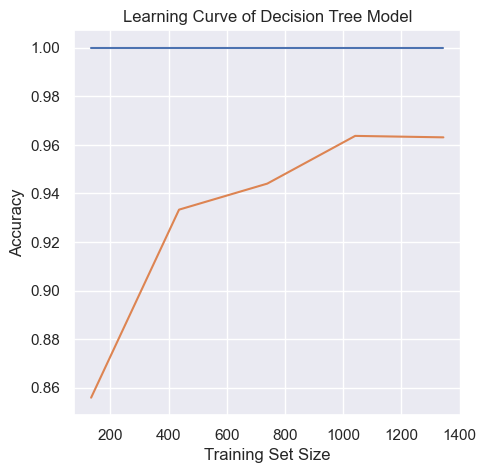

<Figure size 600x600 with 0 Axes>

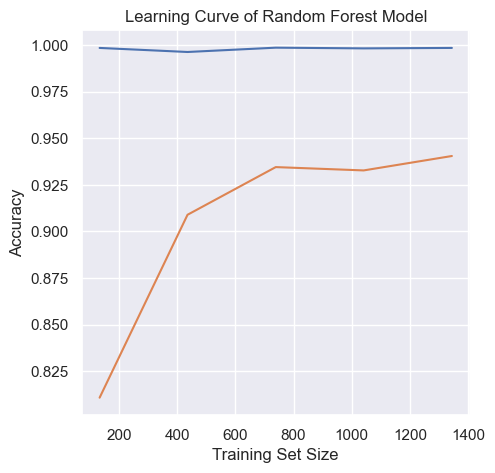

<Figure size 600x600 with 0 Axes>

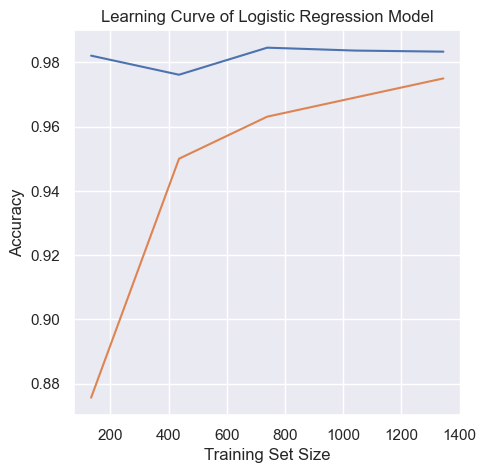

<Figure size 600x600 with 0 Axes>

In [44]:
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy')
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
    plt.title(f'Learning Curve of {title}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.figure(figsize=(6, 6))
    plt.show()

# Plot learning curves for each model
plot_learning_curve(tree, X_train, y_train, 'Decision Tree Model')
plot_learning_curve(forest_cls, X_train, y_train, 'Random Forest Model')
plot_learning_curve(log_reg, X_train, y_train, 'Logistic Regression Model')

C:\Users\Popo\AppData\Local\Temp\ipykernel_8556\157496322.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))  # Color map


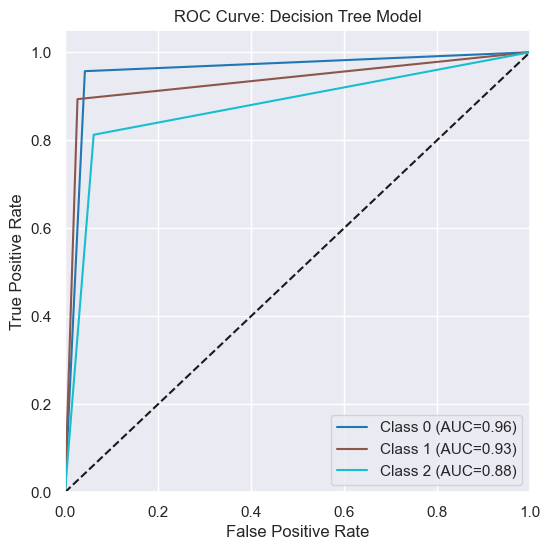

C:\Users\Popo\AppData\Local\Temp\ipykernel_8556\157496322.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))  # Color map


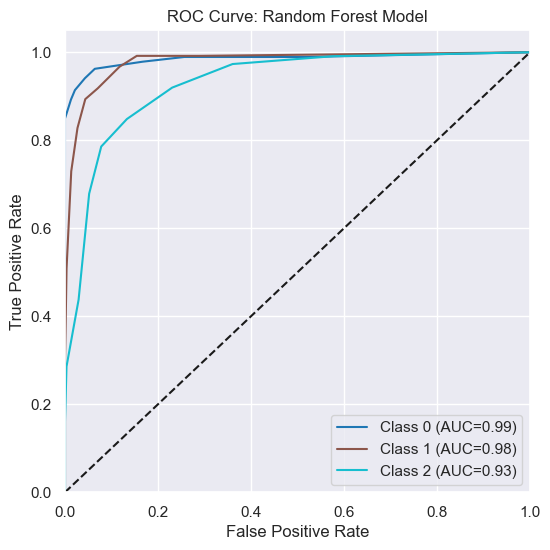

C:\Users\Popo\AppData\Local\Temp\ipykernel_8556\157496322.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))  # Color map


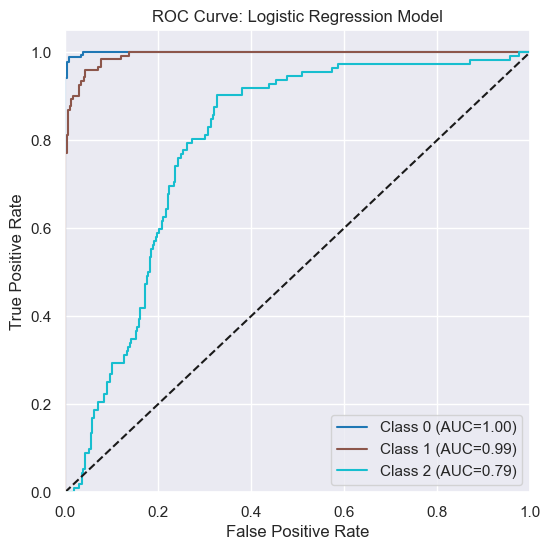

In [45]:
# Function to plot ROC curve for each model
def plot_roc_curve(model, X_test, y_test, title):
    # Binarize labels for multiclass classification (if needed)
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Train One-vs-Rest classifier if multiclass problem
    ovr_classifier = OneVsRestClassifier(model)
    ovr_classifier.fit(X_test, y_test_bin)

    # Check if model has a 'decision_function' method or fallback to 'predict_proba'
    if hasattr(ovr_classifier, "decision_function"):
        y_scores = cross_val_predict(ovr_classifier, X_test, y_test_bin, cv=3, method="decision_function")
    else:
        y_scores = cross_val_predict(ovr_classifier, X_test, y_test_bin, cv=3, method="predict_proba")

    # Plot ROC curves
    plt.figure(figsize=(6, 6))
    colors = cm.get_cmap('tab10', len(ovr_classifier.classes_))  # Color map

    for i in range(len(ovr_classifier.classes_)):
        if y_scores.ndim > 1:
            y_scores_i = y_scores[:, i]
        else:
            y_scores_i = y_scores
            
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores_i)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, color=colors(i), label=f'Class {i} (AUC={roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {title}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot ROC Curves for each model
plot_roc_curve(tree, X_test, y_test, 'Decision Tree Model')
plot_roc_curve(forest_cls, X_test, y_test, 'Random Forest Model')
plot_roc_curve(log_reg, X_test, y_test, 'Logistic Regression Model')


# Section 5: Hyperparameter Tuning using GridSearchCV

Fine-tune Decision Tree

In [46]:
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=tree, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# Fit GridSearchCV
grid_search_dt.fit(X_train_tr, y_train)
best_params_dt = grid_search_dt.best_params_
# Print the best parameters
print("\nBest parameters for Decision Tree:", best_params_dt)
final_tree = DecisionTreeClassifier(**best_params_dt, random_state=42)
final_tree.fit(X_train_tr, y_train)
y_pred_final_tree = final_tree.predict(X_test_tr)
print(f"\nFinal Decision Tree Model Accuracy: {accuracy_score(y_test, y_pred_final_tree):.4f}")
# Print classification report for detailed performance metrics
print("\nClassification Report for Final Decision Tree Model:\n", classification_report(y_test, y_pred_final_tree))

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Final Decision Tree Model Accuracy: 0.9714

Classification Report for Final Decision Tree Model:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       186
           1       0.99      0.94      0.97       122
           2       0.92      0.97      0.95       112

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420



Fine-tune Random Forest

In [47]:
# Define the parameter grid for Random Forest
param_grid_rf = {'bootstrap': [True, False], 'n_estimators': [12, 20, 28], 'max_features': [4, 6, 8]}
# Initialize GridSearchCV
grid_search = GridSearchCV(forest_cls, param_grid_rf, cv = 5, scoring = 'neg_mean_squared_error')
# Fit GridSearchCV
grid_search.fit(X_train_tr, y_train)
best_params_rf = grid_search.best_params_
print("\nBest parameters for Random Forest:", best_params_rf)
final_forest = RandomForestClassifier(**best_params_rf, random_state=42)
final_forest.fit(X_train_tr, y_train)
y_pred_final_forest = final_forest.predict(X_test_tr)
print(f"\nFinal Random Forest Model Accuracy: {accuracy_score(y_test, y_pred_final_forest):.4f}")
print("\nClassification Report for Final Random Forest Model:\n", classification_report(y_test, y_pred_final_forest))


Best parameters for Random Forest: {'bootstrap': True, 'max_features': 8, 'n_estimators': 20}

Final Random Forest Model Accuracy: 0.9595

Classification Report for Final Random Forest Model:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       186
           1       0.97      0.93      0.95       122
           2       0.92      0.93      0.92       112

    accuracy                           0.96       420
   macro avg       0.96      0.95      0.95       420
weighted avg       0.96      0.96      0.96       420



Fine-tune Logistic Regression

In [48]:
param_grid_logreg = {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['saga']}
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_logreg.fit(X_train_tr, y_train)
best_params_logreg = grid_search_logreg.best_params_
print("\nBest parameters for Logistic Regression:", best_params_logreg)
final_logreg = LogisticRegression(**best_params_logreg, max_iter=500, random_state=42)
final_logreg.fit(X_train_tr, y_train)
y_pred_final_logreg = final_logreg.predict(X_test_tr)
print(f"\nFinal Logistic Regression Model Accuracy: {accuracy_score(y_test, y_pred_final_logreg):.4f}")
print("\nClassification Report for Final Logistic Regression Model:\n", classification_report(y_test, y_pred_final_logreg))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Popo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

Final Logistic Regression Model Accuracy: 0.9786

Classification Report for Final Logistic Regression Model:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       186
           1       0.99      0.95      0.97       122
           2       0.95      0.97      0.96       112

    accuracy                           0.98       420
   macro avg       0.98      0.97      0.98       420
weighted avg       0.98      0.98      0.98       420



# Section 6: Predicting on the test set

In [49]:
#  Evaluate the best model on test set FOREST
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tr)
final_accuracy = accuracy_score(y_test, y_pred)
print(final_accuracy)

0.9595238095238096


In [50]:
#  Evaluate the best model on test set TREE
best_model = grid_search_dt.best_estimator_
y_pred = best_model.predict(X_test_tr)
final_accuracy = accuracy_score(y_test, y_pred)
print(final_accuracy)

0.9714285714285714


In [51]:
#  Evaluate the best model on test set LOG
best_model = grid_search_logreg.best_estimator_
y_pred = best_model.predict(X_test_tr)
final_accuracy = accuracy_score(y_test, y_pred)
print(final_accuracy)

0.9785714285714285


# Section 7: Feature Importance

In [78]:
# Random Forest Feature Importance
best_model_rf = grid_search.best_estimator_
feature_importances_rf = best_model_rf.feature_importances_

# Prepare feature names
num_features = numerical_columns2
cat_features = encoder.get_feature_names_out(categorical_columns2)
all_features = num_features + list(cat_features)

# Combine and sort
sorted_rf_importances = sorted(zip(feature_importances_rf, all_features), reverse=True)

# Convert to DataFrame for better visualization
rf_importance_df = pd.DataFrame(sorted_rf_importances, columns=['Importance', 'Feature'])
print("Random Forest Feature Importances:")
print(rf_importance_df)

Random Forest Feature Importances:
    Importance           Feature
0     0.550606        Weight(kg)
1     0.098559        Height(cm)
2     0.061353  Family_history_1
3     0.052943               Age
4     0.036913           Snack_3
5     0.027474   Water_intake(L)
6     0.024269           Snack_1
7     0.017619          Gender_1
8     0.015671            Income
9     0.014001          Vege_day
10    0.013557         Meals_day
11    0.013097       Junk_food_1
12    0.012393          Exercise
13    0.009397         Alcohol_1
14    0.009268         Alcohol_3
15    0.009207  Transportation_1
16    0.006524              TV_2
17    0.005766              TV_1
18    0.005447      Discipline_1
19    0.004311  Transportation_4
20    0.003896  Transportation_2
21    0.003117         Smoking_1
22    0.002210           Snack_2
23    0.001793         Alcohol_2
24    0.000609  Transportation_3


In [79]:
# Decision Tree Feature Importance
best_model_dt = grid_search_dt.best_estimator_
feature_importances_dt = best_model_dt.feature_importances_

# Combine and sort
sorted_dt_importances = sorted(zip(feature_importances_dt, all_features), reverse=True)

# Convert to DataFrame for better visualization
dt_importance_df = pd.DataFrame(sorted_dt_importances, columns=['Importance', 'Feature'])
print("Decision Tree Feature Importances:")
print(dt_importance_df)

Decision Tree Feature Importances:
    Importance           Feature
0     0.751461        Weight(kg)
1     0.218707        Height(cm)
2     0.007181               Age
3     0.005698           Snack_3
4     0.004842  Transportation_3
5     0.004121   Water_intake(L)
6     0.004078          Exercise
7     0.001873  Family_history_1
8     0.001262         Meals_day
9     0.000778  Transportation_2
10    0.000000          Vege_day
11    0.000000  Transportation_4
12    0.000000  Transportation_1
13    0.000000              TV_2
14    0.000000              TV_1
15    0.000000           Snack_2
16    0.000000           Snack_1
17    0.000000         Smoking_1
18    0.000000       Junk_food_1
19    0.000000            Income
20    0.000000          Gender_1
21    0.000000      Discipline_1
22    0.000000         Alcohol_3
23    0.000000         Alcohol_2
24    0.000000         Alcohol_1


In [80]:
# Logistic Regression Coefficients
best_model_logreg = grid_search_logreg.best_estimator_
coefficients_logreg = best_model_logreg.coef_[0]

# Prepare feature names
all_features_logreg = num_features + list(cat_features)

# Combine and sort
sorted_logreg_coefficients = sorted(zip(coefficients_logreg, all_features_logreg), reverse=True)

# Convert to DataFrame for better visualization
logreg_coefficients_df = pd.DataFrame(sorted_logreg_coefficients, columns=['Coefficient', 'Feature'])
print("Logistic Regression Coefficients:")
print(logreg_coefficients_df)

Logistic Regression Coefficients:
    Coefficient           Feature
0     19.503906        Weight(kg)
1      1.301282       Junk_food_1
2      0.983483         Alcohol_2
3      0.978991           Snack_3
4      0.581077  Transportation_3
5      0.564269              TV_2
6      0.442873  Family_history_1
7      0.331981              TV_1
8      0.326032  Transportation_4
9      0.134699  Transportation_1
10     0.110832               Age
11     0.063088   Water_intake(L)
12     0.044131            Income
13     0.041247         Meals_day
14     0.015278          Exercise
15     0.002565         Alcohol_1
16    -0.028964          Vege_day
17    -0.087478         Smoking_1
18    -0.115282           Snack_2
19    -0.246658         Alcohol_3
20    -0.288189  Transportation_2
21    -0.514403           Snack_1
22    -0.636421      Discipline_1
23    -1.199578          Gender_1
24    -6.365423        Height(cm)
